<a href="https://colab.research.google.com/github/ishika-b/neural-networks/blob/main/nnfl_assn2_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
def hypothesis(x,w):
  z = np.dot(x, w.T)
  return 1 / (1 + np.exp(-z))

In [ ]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [ ]:
def train(x,y):
  # x is 70x4 for train
  # y is 70x1 for train

  #variables
  iter = 100
  lr = 0.05

  #weights and bias initialisation 
  w = np.zeros((1,4))
  b = 0

  costs = []

  for i in range(iter):
    h = hypothesis(x,w)  # a 70x1 array for train
    db = (h-y)*(h)*(np.ones((x.shape[0],1))-h)
    w = w - lr * np.sum(db*x, axis = 0) 
    b = b - lr * np.sum(db)

    loss = cost(h,y)
    costs.append(loss)
    
  return w,b,costs
     

final validation cost is: 0.019866199725138322
final test cost is: 0.01990880544359583
accuracy: 1.0
sensitivity: 1.0
specificity: 1.0


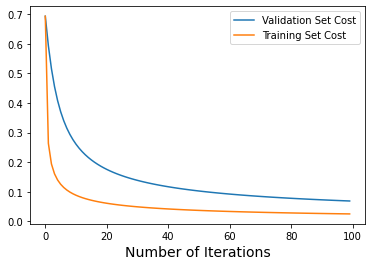

In [ ]:
if __name__ == '__main__':
  data = pd.read_excel('/content/drive/My Drive/nnfl/nnfl2/data55.xlsx', sheet_name='Sheet1',header=None)
  data_shuffled = data.sample(frac=1).reset_index(drop=True)
  
  x = np.zeros((100,4))
  y = np.zeros((100,1))

  for i in range(100):
   x[i][0] = data_shuffled[0][i]
   x[i][1] = data_shuffled[1][i]
   x[i][2] = data_shuffled[2][i]
   x[i][3] = data_shuffled[3][i]

   y[i][0] = data_shuffled[4][i]
  
  for i in range(4):
    mean = np.mean(x[:,i]) 
    std = np.std(x[:,i])
    x[:,i] = [(a-mean)/std for a in x[:,i]]


 # train test and validation split  
  x_train = x[0:70][:]
  x_val =  x[70:80][:]
  x_test = x[80:100][:]
  y_train = y[0:70][:]
  y_val =  y[70:80][:]
  y_test = y[80:100][:]  

  w_train, b_train, costs_tr = train(x_train,y_train)
  w_val, b_val, costs_val = train(x_val,y_val)

  fig = plt.figure()
  plt.xlabel('Number of Iterations', fontsize=14)
  plt.plot(range(0,100),costs_val, label = 'Validation Set Cost')
  plt.plot(range(0,100),costs_tr, label = 'Training Set Cost')
  plt.legend()


  print("final validation cost is:",cost(hypothesis(x_val,w_train),y_val))
  print("final test cost is:",cost(hypothesis(x_test,w_train),y_test))
   
  predictions = hypothesis(x_test, w_train).round()
  #print(predictions)
  
  correct_arr = [1 if (a == b ) else 0 for (a, b) in zip(predictions, y_test)] 
  sensitivity_arr = []
  specificity_arr = []
  
  for i in range(y_test.shape[0]):
    if (predictions[i] == 1 and y_test[i]==1):
      sensitivity_arr.append(1)
    elif (predictions[i]==0 and y_test[i]==1):
      sensitivity_arr.append(0)
    if (predictions[i] == 0 and y_test[i]== 0):
      specificity_arr.append(1)
    elif (predictions[i]==1 and y_test[i]== 0):
      specificity_arr.append(0)
    
  acc = sum(correct_arr)/len(correct_arr) 
  sens = sum(sensitivity_arr)/len(sensitivity_arr)
  spec = sum(specificity_arr)/len(specificity_arr)

  print("accuracy:",acc)
  print("sensitivity:",sens)
  print("specificity:",spec)